Hola **Macarena**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto 10: Tomar decisiones de negocio basadas en datos

## Introducción

Junto con el departamento de marketing de una gran tienda online, se ha recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.
Se priorizarán estas hipótesis y se realizará un test A/B para posteriormente analizar los resultados.

## Descripción de los datos

La tabla *hypotheses* para la primera parte del proyecto contiene:  

- hypotheses: breves descripciones de las hipótesis.
- reach: alcance del usuario, en una escala del 1 al 10.
- impact: impacto en los usuarios, en una escala del 1 al 10.
- confidence: confianza en la hipótesis, en una escala del 1 al 10.
- effort: los recursos necesarios para probar una hipótesis, en una escala del 1 al 10. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.  

Para la segunda parte del proyecto, se utilizarán las tablas *orders* y *visits*:  

Orders:
- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.

Visits:
- date: la fecha.
- group: grupo de la prueba A/B.
- visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo incluyendo la tabla de contenidos y la redacción de la introducción! Procura mantener esta práctica en tus próximos proyectos ya que esto ayuda a entender el objetivo del proyecto
</div>

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

In [2]:
# Cargar datos de las hipotesis
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
# Cambiar nombres de columnas para cumplir con el formato PEP8
new_columns = []

for column in hypotheses.columns:
    lowered = column.lower()
    new_columns.append(lowered)
    
hypotheses.columns = new_columns

In [5]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión inicial de tus datos, siempre es importante entender con lo que trabajarás!
</div>

## Priorizar Hipotesis

In [6]:
# Aplicar el framework ICE para priorizar hipótesis
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [7]:
# Priorización de las hipótesis según ICE
hypotheses[['hypothesis', 'ice']].sort_values('ice', ascending=False)

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [8]:
# Aplicar el framework RICE para priorizar hipótesis
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [9]:
# Priorización de las hipótesis según RICE
hypotheses[['hypothesis', 'rice']].sort_values('rice', ascending=False)

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Ambos frameworks sirven para priorizar hipótesis, pero difieren en sus resultados ya que "RICE" además del impacto y la confianza, considera el alcance al realizar la categorización, lo cual cambia los valores del resultado, por ello es bueno comparar y considerar ambos, lo que puede brindar una perspectiva más amplia.

In [10]:
hypotheses.loc[7,'hypothesis']

'Add a subscription form to all the main pages. This will help you compile a mailing list'

In [11]:
hypotheses.loc[0,'hypothesis']

'Add two new channels for attracting traffic. This will bring 30% more users'

Las hipótesis de índice 0 y 7 se repiten dentro de las primeras 3 en la aplicación de ambos frameworks; ICE y RICE, sin embargo, la hipotesis 7 tiene una calificación de "Reach" de 10 vs el puntaje de 3 que tiene la hipotesis 0, de modo que la anterior tiene un alcance más significativo en relación a la cantidad de personas que se verán afectadas. Además ambas hipótesis tienen un puntaje similar en las demás categorías "impacto, confianza y esfuerzo", por lo que la hipótesis de "Añadir un formulario de suscripción" podría evaluarse antes de "Añadir 2 nuevos canales para atraer mayor tráfico".

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! Para una mejor visualización de las diferencias podrías mostrar una gráfica con estos datos
</div>

## Análisis del test A/B

In [12]:
# Cargar datos de pedidos
orders = pd.read_csv('/datasets/orders_us.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
# Cargar datos de visitas
visits = pd.read_csv('/datasets/visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# Explorar data de pedidos
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [15]:
# Cambiar nombres de columna para cumplir con el formato PEP8
orders.rename(columns= {'transactionId':'transaction_id', 'visitorId':'user_id'}, inplace=True)
orders.head()

,transaction_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


No hay datos nulos en *orders*

In [16]:
orders.duplicated().sum()

0

No hay duplicados explícitos en *orders*

In [17]:
# Buscar duplicados en las transacciones
orders['transaction_id'].duplicated().sum()

0

In [18]:
# Buscar usuarios duplicados
orders['user_id'].duplicated().sum()

166

In [19]:
# Eliminar "usuarios" duplicados
orders['user_id'].drop_duplicates()

0       3312258926
1       3642806036
2       4069496402
3       1196621759
4       2322279887
           ...    
1191     608641596
1192    3733762160
1193     370388673
1194     573423106
1196    2108080724
Name: user_id, Length: 1031, dtype: int64

Se eliminaron los usuarios que estaban en ambos grupos, pues aunque se reduzca el tamaño de la muestra, conservar usuarios en ambos grupos reducirá la validez de la prueba

In [20]:
# Transformar datos de la columna "date" a formato datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [21]:
# Explorar data de visitas
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


No hay valores nulos en *visits*

In [22]:
visits.duplicated().sum()

0

No se encuentran duplicados explicitos en *visits*

In [23]:
# Transformar datos de la columna "date" a formato datetime
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

## Análisis con datos en bruto

In [24]:
# Buscar registros únicos de fechas de pedidos y grupos a los que pertenecen
dates_groups = orders[['date', 'group']].drop_duplicates()

In [25]:
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [26]:
# Ordenes agregadas
orders_aggregated = (
    dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
        'date':'max', 
        'group':'max', 
        'transaction_id':pd.Series.nunique, 
        'user_id':pd.Series.nunique, 
        'revenue':'sum'
    }), axis=1)
).sort_values(by=['date', 'group'])

In [27]:
orders_aggregated

,date,group,transaction_id,user_id,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [28]:
# Visitas agregados
visits_aggregated = (
    dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({
        'date':'max', 
        'group':'max', 
        'visits':'sum'
    }), axis=1)
).sort_values(by=['date', 'group'])

In [29]:
visits_aggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [30]:
# Unión de ambos dataframes de métricas acumuladas
cumulative_data = orders_aggregated.merge(visits_aggregated, how='inner', on=['date', 'group'])

In [31]:
cumulative_data

,date,group,transaction_id,user_id,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [32]:
# Renombrar columnas
cumulative_data.columns= ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [33]:
# Métricas acumuladas según grupo A/B
cumulative_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'orders', 'revenue', 'visitors']]

cumulative_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'orders', 'revenue', 'visitors']]

In [34]:
# Agregar columna de conversión, para cada grupo
cumulative_A['conversion'] = cumulative_A['orders'] / cumulative_A['visitors']

cumulative_B['conversion'] = cumulative_B['orders'] / cumulative_B['visitors']

### Ingresos acumulados

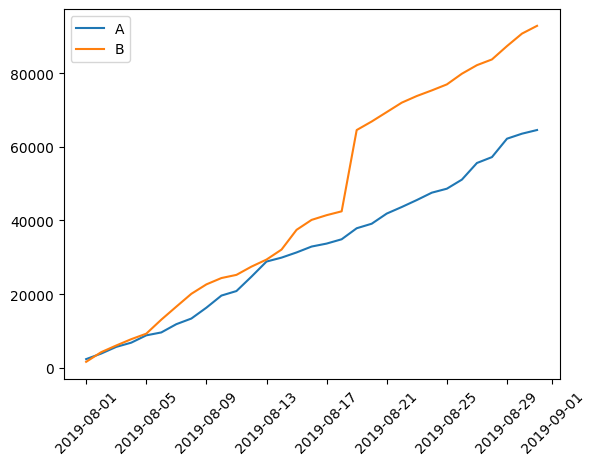

In [35]:
# Ingreso acumulado por grupo
plt.plot(cumulative_A['date'], cumulative_A['revenue'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Se produce una diferencia alrededor de la mitad de la prueba; en donde el grupo B toma la delantera para los ingresos; lo cual podría verse intervenido por pedidos más grandes -atípicos- en este grupo, por lo que también habría que realizar este análisis para ver si difieren. 

### Tamaño promedio de compra

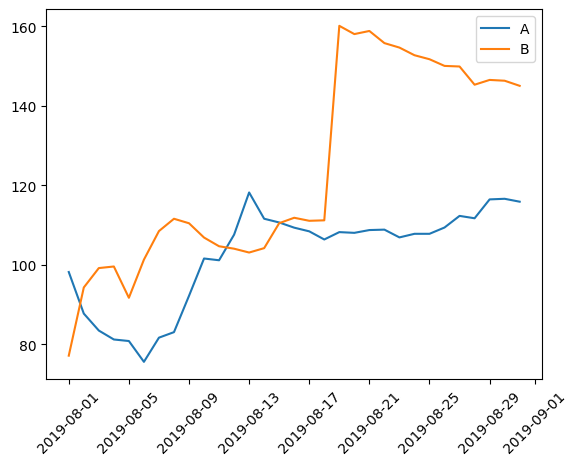

In [36]:
# Tamaño promedio de compra acumulado, según grupo
plt.plot(cumulative_A['date'], (cumulative_A['revenue'] / cumulative_A['orders']), label='A')
plt.plot(cumulative_B['date'], (cumulative_B['revenue'] / cumulative_B['orders']), label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Hay bastante fluctuación de cada grupo dentro del mes, aunque el grupo B ha liderado el mayor tamaño promedio de compra durante casi todo el período. Sin embargo, aún falta analizar la conversión y ver si existen outliers que puedan interferir en los resultados. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente
</div>

In [37]:
# Unir datas de métricas acumuladas para luego calcular diferencia relativa
cumulative_merge = cumulative_A.merge(cumulative_B, how='left', on='date', suffixes=['A', 'B'])

In [38]:
cumulative_merge.head()

,date,ordersA,revenueA,visitorsA,conversionA,ordersB,revenueB,visitorsB,conversionB
0,2019-08-01,24,2356.8,719,0.033380,21,1620.0,713,0.029453
1,2019-08-02,44,3860.3,1338,0.032885,45,4243.8,1294,0.034776
2,2019-08-03,68,5675.5,1845,0.036856,61,6050.6,1803,0.033833
3,2019-08-04,84,6822.1,2562,0.032787,78,7767.9,2573,0.030315
4,2019-08-05,109,8810.2,3318,0.032851,101,9262.9,3280,0.030793


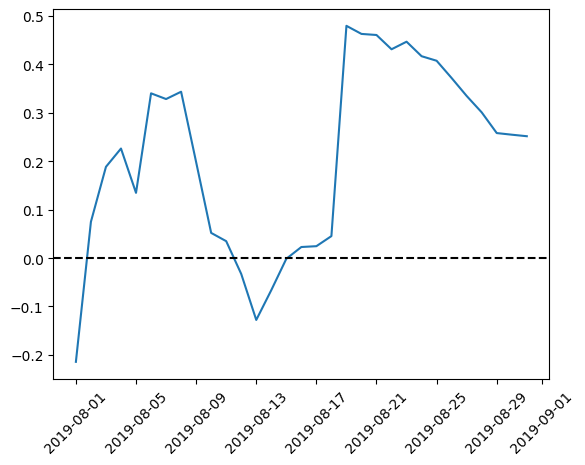

In [39]:
# Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A
plt.plot(cumulative_merge['date'], 
         (cumulative_merge['revenueB'] / cumulative_merge['ordersB']) / 
         (cumulative_merge['revenueA'] / cumulative_merge['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Se pueden apreciar 3 peaks en donde el grupo B supera en más del 20% al grupo A en cuanto al tamaño promedio de compra, peaks que quizá puedan deberse a compras atípicas bastante grandes, y a pesar de que en 2 ocasiones fue liderando el grupo A, el segmento B logró un tamaño promedio de compra mayor durante casi toda la duración de la prueba.

### Conversión

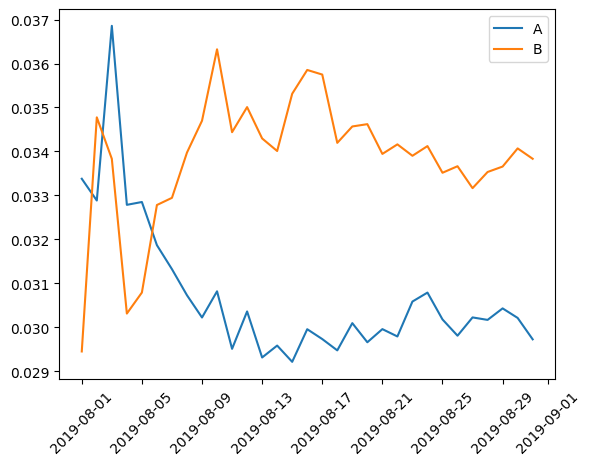

In [40]:
# Gráficas de conversion acumulada de cada grupo
plt.plot(cumulative_merge['date'], cumulative_merge['conversionA'], label='A')
plt.plot(cumulative_merge['date'], cumulative_merge['conversionB'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Si bien en una primera impresión se puede ver que el grupo B tiene una mayor conversión acumulada respecto al grupo A, la diferencia no es tan grande si nos fijamos en que el grupo A fluctúa alrededor de una conversión del 3%, mientras quepara el grupo B es del 3.4%.  
Sin embargo, un aspecto importante a considerar es que el grupo B comenzó en un 3% pero va al alza manteniendose cercano al 3.4% hacia el final de la prueba, en cambio; el grupo A comenzó cerca del 3.4% logrando un peak de 3.7% en los primeros días, para luego decrecer y fluctuar levemente aldedor del 3% por lo que ha caído la conversión en este grupo.

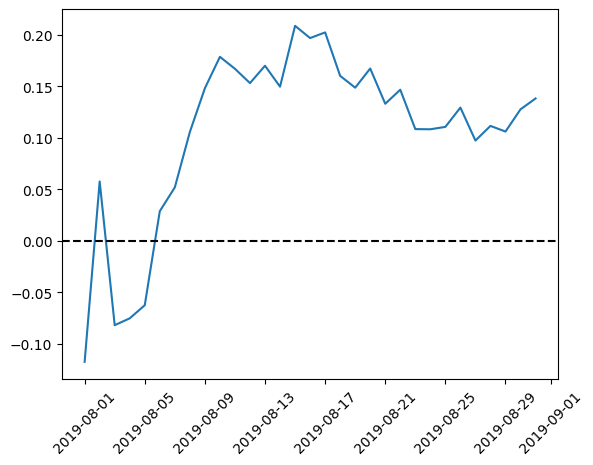

In [41]:
# Diferencia relativa de la conversión del grupo B en comparación con el grupo A
plt.plot(cumulative_merge['date'], (cumulative_merge['conversionB'] / cumulative_merge['conversionA'] - 1))
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

La conversión del grupo B fue entre un 10-20% más respecto al grupo A durante la prueba, liderando casi desde el comienzo del mes.

### N° de pedidos por usuario

In [42]:
# Número de pedidos por usuario
orders_by_users = (
    orders.groupby('user_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users.columns = ['user_id', 'orders']

In [43]:
orders_by_users

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


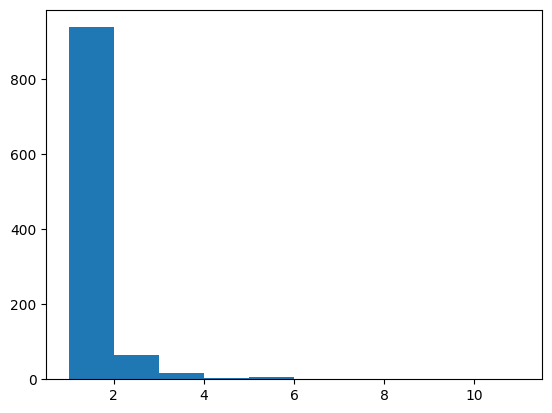

In [44]:
# Histograma de distribución para el n° de pedidos por usuario
plt.hist(orders_by_users['orders'])
plt.show()

La gran mayoría de usuarios sólo realizó 1 pedidos, unos pocos realizaron 2 pedidos y algunos más pedidos.

In [45]:
# Rango de números desde 0 hasta el número de observaciones en orders_by_users
x_values = pd.Series(range(0,len(orders_by_users)))

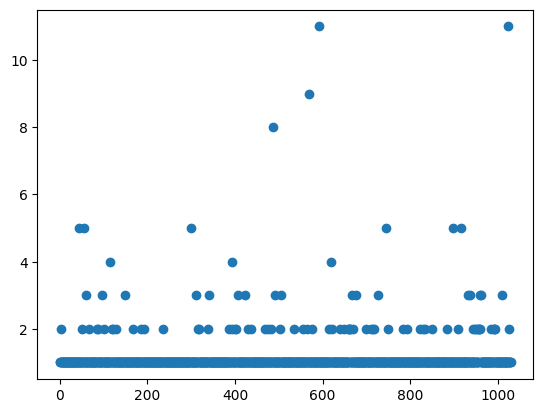

In [46]:
# Gráfico de dispersión del número de pedidos por usuario
plt.scatter(x_values, orders_by_users['orders'])
plt.show()

Los pedidos se concentran mayoritariamente en 1 por usuario, y a pesar de haber algunos usuarios con 2 y hasta 10 pedidos; se buscarán los percentiles de la muestra para determinar qué valores serían atipicos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

In [47]:
# Buscar percentiles 95 y 99 
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

El 5% de usuarios realizó más de 2 pedidos, mientras que no más del 1% de los usuarios realizó más de 4 pedidos.
Se considerará como anomalía el haber realizado 4 o más pedidos.

### Tamaño de los pedidos

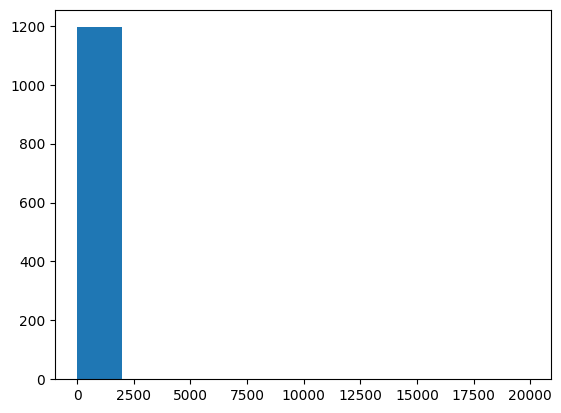

In [48]:
# Histograma para la distribución del tamaño de compra
plt.hist(orders['revenue'])
plt.show()

La gran mayoría de pedidos no tienen un precio superior a los 2000 us

In [49]:
# Rango de valores desde 0 hasta el número de observaciones en ingresos
x_values = pd.Series(range(0,len(orders['revenue'])))

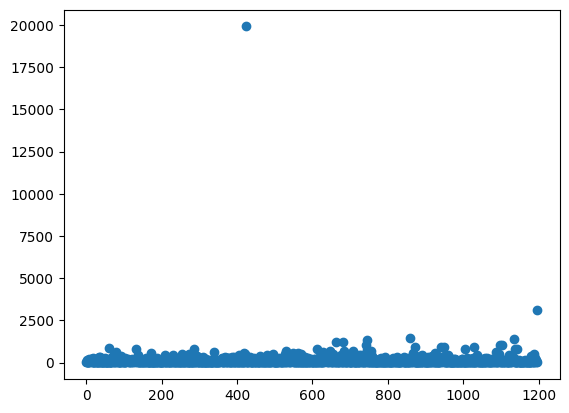

In [50]:
# Gráfico de dispersión del tamaño de los pedidos
plt.scatter(x_values, orders['revenue'])
plt.show()

Definitivamente no hay pedidos de más de 2000 us, el pedido de 20000 claramente es atípico. Se verificarán los percentiles

In [51]:
# Calcular percentiles 95 y 99
np.percentile(orders['revenue'], [95, 99])

array([435.54 , 900.904])

No más del 5% de los usuarios realiza compras de más de 436 us, mientras que tan sólo el 1% realizó pedidos de más de 900 us.  
Se determinará como valor atípico aquellos pedidos de más de 600 us

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

### Diferencias de conversión entre los grupos

In [52]:
# Cantidad de pedidos por usuario del grupo A
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('user_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders']

In [53]:
# Cantidad de pedidos por usuario del grupo B
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('user_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders']

In [54]:
# Usuarios sin pedidos en el grupo A
visits[visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders'])

18233

In [55]:
# Crear una serie con 0 para los usuarios que no hicieron pedidos
pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [56]:
# Unir la serie con pedidos por usuario y los usuarios con 0 pedidos, para formar la muestra del grupo A
sample_A = pd.concat(
    [orders_by_users_A['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders']))
    , name='orders')]
    ,axis=0
)

In [57]:
# Usuarios sin pedidos en el grupo B
visits[visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders'])

18330

In [58]:
# Crear una serie con 0 para los usuarios que no hicieron pedidos
pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18330, dtype: int64

In [59]:
# Unir la serie con pedidos por usuario y los usuarios con 0 pedidos, para formar la muestra del grupo B
sample_B = pd.concat(
    [orders_by_users_B['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders']))
    , name='orders')]
    ,axis=0
)

In [60]:
# Significancia estadística de la diferencia en la conversión entre los grupos. Valor p:
"{0:.3f}".format(st.mannwhitneyu(sample_A, sample_B)[1])

'0.017'

El valor p es inferior a 0.05 por lo que *se rechaza la hipótesis nula*; las tasas de conversión entre los 2 grupos, de los datos sin procesar, tiene diferencias estadisticamente significativas.

In [61]:
# Diferencia Relativa de la conversión del grupo B en comparación con el grupo A
"{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1)

'0.138'

El grupo B tiene una ganancia en la conversión relativa del 13.8% respecto al grupo A

### Diferencias en el tamaño promedio del pedido

In [62]:
# Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos. Valor p
"{0:.3f}".format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1])

'0.692'

El valor p es mayor a 0.05 por lo que *no se puede rechazar la hipotesis nula*; no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre ambos grupos.

In [63]:
# Diferencia relativa entre el tamaño promedio del pedido del grupo B comparado con el grupo A
"{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1)

'0.252'

El grupo B tiene una ganancia relativa para el tamaño promedio del pedido, de 25.2% en comparación con el grupo A

<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo aplicando las pruebas de hipótesis con los datos sin filtrar, veamos como resulta la misma prueba con los datos filtrados. Te recomiendo que aproveches más los strings formateados agregando texto que describa el valor que vas a mostrar, así es más fácil entender lo que quieres comunicar con esos números
</div>

## Análisis con datos filtrados

Los valores atípicos se definieron para aquellos usuarios con *más de 3 pedidos*, considerando que >2 pedidos es el 5% de usuarios y >4 pedidos el 1%. En cuanto al tamaño de la compra, se considerará anomalía el pedido de >600 us teniendo en cuenta que >436 us es el 5% de los pedidos y >900 us el 1%

In [64]:
# Usuarios con valores atípicos
many_orders = pd.concat(
    [orders_by_users_A[orders_by_users_A['orders'] > 3]['user_id'],
    orders_by_users_B[orders_by_users_B['orders'] > 3]['user_id']],
    axis=0
)

expensive_orders = orders[orders['revenue'] > 600]['user_id']
#expensive_orders.name = 'user_id'

In [65]:
# Unir id de usuarios con >3 pedidos y >600 us
atypical_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [66]:
atypical_users.head()

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
Name: user_id, dtype: int64

In [67]:
# Muestra del grupo A sin los usuarios atipicos
sample_A_filtered = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(atypical_users))]['orders'], 
    pd.Series(0, index= np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')], 
    axis=0
)

In [68]:
# Muestra del grupo B sin los usuarios atipicos
sample_B_filtered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(atypical_users))]['orders'], 
    pd.Series(0, index= np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')], 
    axis=0
)

### Conversión

In [69]:
# Significancia estadística de la diferencia en la conversión entre los grupos con los datos filtrados
"{0:.3f}".format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1])

'0.010'

Valor p < 0.05 por tanto, hay significancia estadística para *rechazar la hipótesis*; las tasas de conversión son diferentes entre ambos grupos

In [70]:
# Diferencia relativa de la tasa de conversión entre el grupo B vs A, con los datos filtrados
"{0:.3f}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1)

'0.162'

La ganancia relativa del grupo B vs A es un poco mayor al filtrar los datos; en este caso el grupo B tuvo una covnersión de 16.2% más que el grupo A (sin filtrar los datos esta había sido de 13.8%), por lo que definitivamente las tasas de conversión difieren entre ambos grupos, teniendo el grupo B una mayor tasa de conversión.

### Tamaño promedio del pedido

In [71]:
# Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos, con los datos filtrados
"{0:.3f}".format(
    st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                         np.logical_not(orders['user_id'].isin(atypical_users)))]['revenue'],
                   orders[np.logical_and(orders['group'] == 'B',
                                        np.logical_not(orders['user_id'].isin(atypical_users)))]['revenue'])[1]
)

'0.688'

También con los datos filtrados, el valor p > 0.05 por lo que *no se puede rechazar la hipótesis*; la diferencia en el tamaño promedio del pedido no es significativa entre ambos grupos.

In [72]:
# Diferencia relativa entre el grupo B y A para el tamaño promedio del pedido (datos filtrados)
"{0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
        np.logical_not(orders['user_id'].isin(atypical_users)))]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['user_id'].isin(atypical_users)))]['revenue'].mean() - 1
)

'0.058'

Al filtrar los datos la "ganancia relativa" del grupo B respecto al A, disminuye considerablemente, pues sin los valores atípicos de los pedidos, el grupo B tiene sólo un 5.8% mayor valor promedio de pedido, lo que difiere bastante sin filtrar los datos pues en ese caso la diferencia relativa era de un 25.2% más para el grupo B

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada la prueba de hipótesis con los datos filtrados!
</div>

## Decisión basada en los resultados de la prueba

Si bien al comenzar el test A/B fue el grupo B que lideró en todas las métricas; conversión, mayores ingresos y mayor tamaño del pedido; al quitar los valores atípicos, estos resultados cambiaron pues a pesar de continuar liderando la conversión, se pudo observar que en cuanto a tamaño promedio del pedido no existen diferencias estadísticamente significativas; el grupo B supera muy levemente al grupo A, es decir; los pedidos con un valor atípico fueron los que afectaron este parámetro. Sin embargo, aún con los datos filtrados, la conversión es significativamente mayor en el grupo B, por lo que tras los datos obtenidos, es suficiente para determinar detener la prueba y considerar al grupo B con una mejor tasa de conversión, lo cual podría próximamente brindar mayores ingresos si se apunta a los clientes que realizan pedidos de mayor tamaño y fidelizar a aqque

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>